In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re

## Полиномиальная регрессия вида $$f(x) = k_1x_1^2 + k_2x_2^2 + k_3x_1x_2 + ... + k_nx_1^n + k_nx_2^n + ...$$

In [2]:
df = pd.read_csv("files/c-data-2.csv", names=["x2^1", "x1^1", "y"])

In [3]:
df

,x2^1,x1^1,y
0,5.12674,6.793478,-2.575554
1,1.82674,6.393478,-6.740502
2,10.42674,2.793478,-2.291134
3,9.92674,3.193478,-2.458660
4,7.02674,1.493478,-2.996624
...,...,...,...
95,9.42674,7.593478,-1.123466
96,6.62674,1.393478,-3.562339
97,2.42674,3.093478,-5.673522
98,6.92674,5.393478,-2.596804


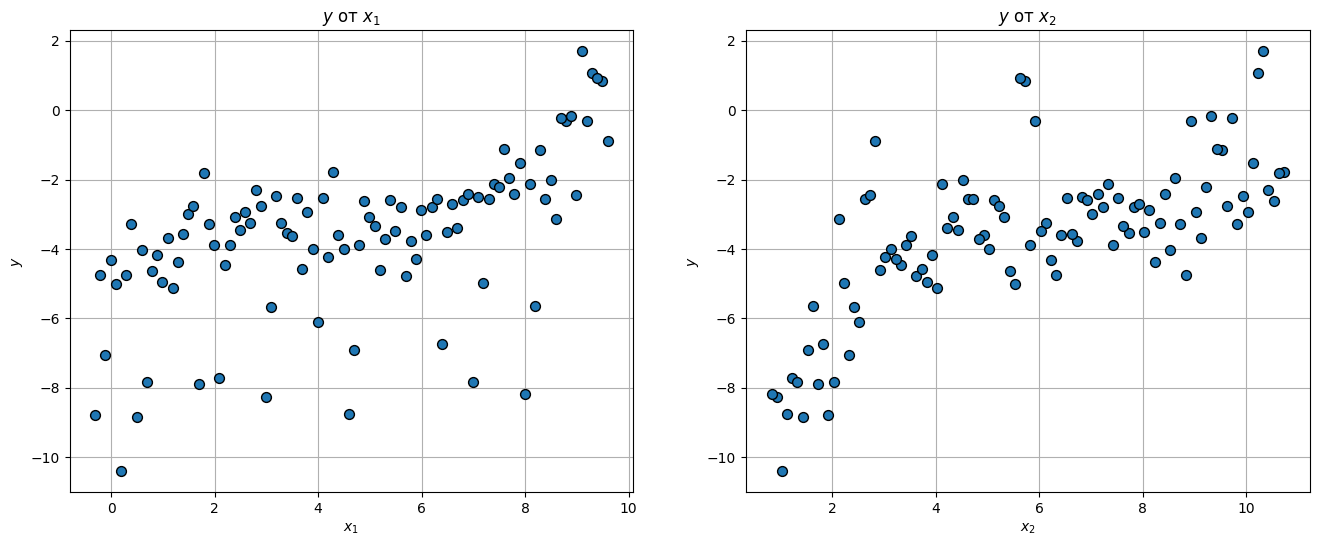

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for i in range(2):
	ax[i].scatter(df[f"x{i + 1}^1"], df["y"], ec="black", zorder=3, s=50)
	ax[i].set_xlabel(f"$x_{i + 1}$")
	ax[i].set_ylabel(f"$y$")
	ax[i].set_title(f"$y$ от $x_{i + 1}$")
	ax[i].grid()

In [5]:
def get_col_degrees(degrees):
	col_degrees = []

	for i in range(1, degrees + 1):
		combination_degree = []
		for j in range(i + 1):
			tmp = ""

			if j > 0:
				tmp += f"x1^{j}"
			
			if i - j > 0:
				tmp += f"x2^{i - j}"

			combination_degree += ["".join(tmp)]
		
		col_degrees += combination_degree
	
	return col_degrees

In [6]:
degrees = 10
col_degrees = get_col_degrees(degrees)
col_degrees

['x2^1',
 'x1^1',
 'x2^2',
 'x1^1x2^1',
 'x1^2',
 'x2^3',
 'x1^1x2^2',
 'x1^2x2^1',
 'x1^3',
 'x2^4',
 'x1^1x2^3',
 'x1^2x2^2',
 'x1^3x2^1',
 'x1^4',
 'x2^5',
 'x1^1x2^4',
 'x1^2x2^3',
 'x1^3x2^2',
 'x1^4x2^1',
 'x1^5',
 'x2^6',
 'x1^1x2^5',
 'x1^2x2^4',
 'x1^3x2^3',
 'x1^4x2^2',
 'x1^5x2^1',
 'x1^6',
 'x2^7',
 'x1^1x2^6',
 'x1^2x2^5',
 'x1^3x2^4',
 'x1^4x2^3',
 'x1^5x2^2',
 'x1^6x2^1',
 'x1^7',
 'x2^8',
 'x1^1x2^7',
 'x1^2x2^6',
 'x1^3x2^5',
 'x1^4x2^4',
 'x1^5x2^3',
 'x1^6x2^2',
 'x1^7x2^1',
 'x1^8',
 'x2^9',
 'x1^1x2^8',
 'x1^2x2^7',
 'x1^3x2^6',
 'x1^4x2^5',
 'x1^5x2^4',
 'x1^6x2^3',
 'x1^7x2^2',
 'x1^8x2^1',
 'x1^9',
 'x2^10',
 'x1^1x2^9',
 'x1^2x2^8',
 'x1^3x2^7',
 'x1^4x2^6',
 'x1^5x2^5',
 'x1^6x2^4',
 'x1^7x2^3',
 'x1^8x2^2',
 'x1^9x2^1',
 'x1^10']

In [7]:
def set_degrees(degrees):
	for i in range(1, degrees + 1):
		for j in range(i + 1):
			combination = ""

			if j > 0:
				combination += f"x1^{j}"
			
			if i - j > 0:
				combination += f"x2^{i - j}"

			combination = "".join(combination)
			if "x1" in combination and "x2" in combination:
				_, degree_x1 = combination[:combination.index("x2")].split("^")
				_, degree_x2 = combination[combination.index("x2"):].split("^")
				df[combination] = (df["x1^1"] ** int(degree_x1)) * (df["x2^1"] ** int(degree_x2))
			
			else:
				x, degree_x = combination.split("^")
				df[combination] = df[f"{x}^1"] ** int(degree_x)

In [8]:
set_degrees(degrees)

In [9]:
df

,x2^1,x1^1,y,x2^2,x1^1x2^1,x1^2,x2^3,x1^1x2^2,x1^2x2^1,x1^3,...,x1^1x2^9,x1^2x2^8,x1^3x2^7,x1^4x2^6,x1^5x2^5,x1^6x2^4,x1^7x2^3,x1^8x2^2,x1^9x2^1,x1^10
0,5.12674,6.793478,-2.575554,26.283463,34.828397,46.151348,134.748479,178.556136,236.605961,313.528184,...,1.662126e+07,2.202494e+07,2.918540e+07,3.867377e+07,5.124688e+07,6.790759e+07,8.998482e+07,1.192395e+08,1.580051e+08,2.093736e+08
1,1.82674,6.393478,-6.740502,3.336979,11.679223,40.876565,6.095793,21.334903,74.670856,261.343436,...,1.448198e+03,5.068603e+03,1.773980e+04,6.208822e+04,2.173050e+05,7.605541e+05,2.661893e+06,9.316463e+06,3.260705e+07,1.141227e+08
2,10.42674,2.793478,-2.291134,108.716907,29.126872,7.803521,1133.562916,303.698325,81.365287,21.798968,...,4.068949e+09,1.090132e+09,2.920625e+08,7.824787e+07,2.096376e+07,5.616503e+06,1.504745e+06,4.031434e+05,1.080081e+05,2.893697e+04
3,9.92674,3.193478,-2.458660,98.540167,31.700829,10.198304,978.182611,314.685889,101.235912,32.568063,...,2.988985e+09,9.615705e+08,3.093417e+08,9.951666e+07,3.201497e+07,1.029936e+07,3.313354e+06,1.065921e+06,3.429118e+05,1.103163e+05
4,7.02674,1.493478,-2.996624,49.375075,10.494284,2.230478,346.945811,73.740605,15.672986,3.331170,...,6.237117e+07,1.325650e+07,2.817565e+06,5.988513e+05,1.272811e+05,2.705261e+04,5.749819e+03,1.222079e+03,2.597432e+02,5.520639e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.42674,7.593478,-1.123466,88.863427,71.581746,57.660913,837.692416,674.782506,543.554438,437.846898,...,4.463695e+09,3.595620e+09,2.896363e+09,2.333094e+09,1.879366e+09,1.513877e+09,1.219467e+09,9.823113e+08,7.912767e+08,6.373934e+08
96,6.62674,1.393478,-3.562339,43.913683,9.234219,1.941782,291.004557,61.192766,12.867684,2.705831,...,3.433995e+07,7.221042e+06,1.518449e+06,3.193012e+05,6.714301e+04,1.411891e+04,2.968940e+03,6.243120e+02,1.312810e+02,2.760592e+01
97,2.42674,3.093478,-5.673522,5.889067,7.507068,9.569608,14.291234,18.217701,23.222951,29.603376,...,9.029346e+03,1.151013e+04,1.467249e+04,1.870371e+04,2.384249e+04,3.039313e+04,3.874354e+04,4.938819e+04,6.295743e+04,8.025476e+04
98,6.92674,5.393478,-2.596804,47.979727,37.359222,29.089609,332.343091,258.777617,201.496156,156.894175,...,1.979835e+08,1.541590e+08,1.200353e+08,9.346501e+07,7.277616e+07,5.666686e+07,4.412343e+07,3.435653e+07,2.675157e+07,2.083001e+07


In [10]:
df[col_degrees]

,x2^1,x1^1,x2^2,x1^1x2^1,x1^2,x2^3,x1^1x2^2,x1^2x2^1,x1^3,x2^4,...,x1^1x2^9,x1^2x2^8,x1^3x2^7,x1^4x2^6,x1^5x2^5,x1^6x2^4,x1^7x2^3,x1^8x2^2,x1^9x2^1,x1^10
0,5.12674,6.793478,26.283463,34.828397,46.151348,134.748479,178.556136,236.605961,313.528184,690.820417,...,1.662126e+07,2.202494e+07,2.918540e+07,3.867377e+07,5.124688e+07,6.790759e+07,8.998482e+07,1.192395e+08,1.580051e+08,2.093736e+08
1,1.82674,6.393478,3.336979,11.679223,40.876565,6.095793,21.334903,74.670856,261.343436,11.135428,...,1.448198e+03,5.068603e+03,1.773980e+04,6.208822e+04,2.173050e+05,7.605541e+05,2.661893e+06,9.316463e+06,3.260705e+07,1.141227e+08
2,10.42674,2.793478,108.716907,29.126872,7.803521,1133.562916,303.698325,81.365287,21.798968,11819.365772,...,4.068949e+09,1.090132e+09,2.920625e+08,7.824787e+07,2.096376e+07,5.616503e+06,1.504745e+06,4.031434e+05,1.080081e+05,2.893697e+04
3,9.92674,3.193478,98.540167,31.700829,10.198304,978.182611,314.685889,101.235912,32.568063,9710.164430,...,2.988985e+09,9.615705e+08,3.093417e+08,9.951666e+07,3.201497e+07,1.029936e+07,3.313354e+06,1.065921e+06,3.429118e+05,1.103163e+05
4,7.02674,1.493478,49.375075,10.494284,2.230478,346.945811,73.740605,15.672986,3.331170,2437.898003,...,6.237117e+07,1.325650e+07,2.817565e+06,5.988513e+05,1.272811e+05,2.705261e+04,5.749819e+03,1.222079e+03,2.597432e+02,5.520639e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.42674,7.593478,88.863427,71.581746,57.660913,837.692416,674.782506,543.554438,437.846898,7896.708588,...,4.463695e+09,3.595620e+09,2.896363e+09,2.333094e+09,1.879366e+09,1.513877e+09,1.219467e+09,9.823113e+08,7.912767e+08,6.373934e+08
96,6.62674,1.393478,43.913683,9.234219,1.941782,291.004557,61.192766,12.867684,2.705831,1928.411531,...,3.433995e+07,7.221042e+06,1.518449e+06,3.193012e+05,6.714301e+04,1.411891e+04,2.968940e+03,6.243120e+02,1.312810e+02,2.760592e+01
97,2.42674,3.093478,5.889067,7.507068,9.569608,14.291234,18.217701,23.222951,29.603376,34.681109,...,9.029346e+03,1.151013e+04,1.467249e+04,1.870371e+04,2.384249e+04,3.039313e+04,3.874354e+04,4.938819e+04,6.295743e+04,8.025476e+04
98,6.92674,5.393478,47.979727,37.359222,29.089609,332.343091,258.777617,201.496156,156.894175,2302.054176,...,1.979835e+08,1.541590e+08,1.200353e+08,9.346501e+07,7.277616e+07,5.666686e+07,4.412343e+07,3.435653e+07,2.675157e+07,2.083001e+07


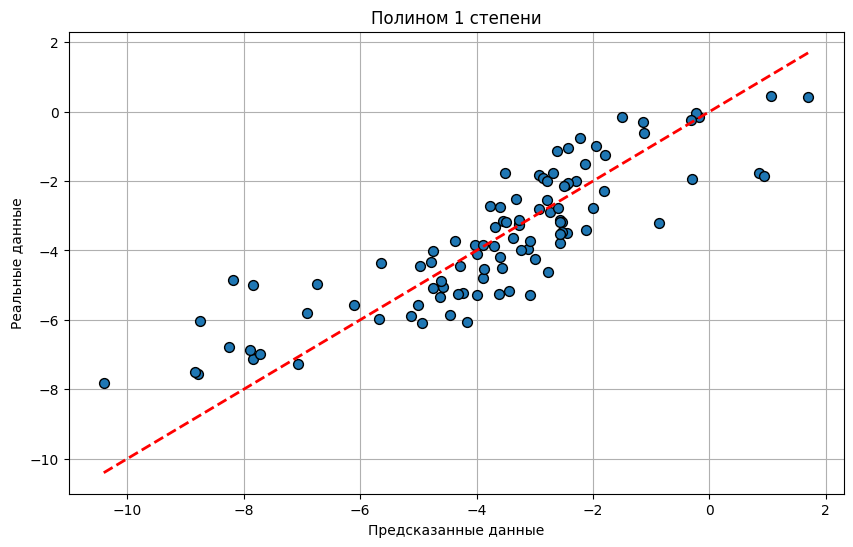

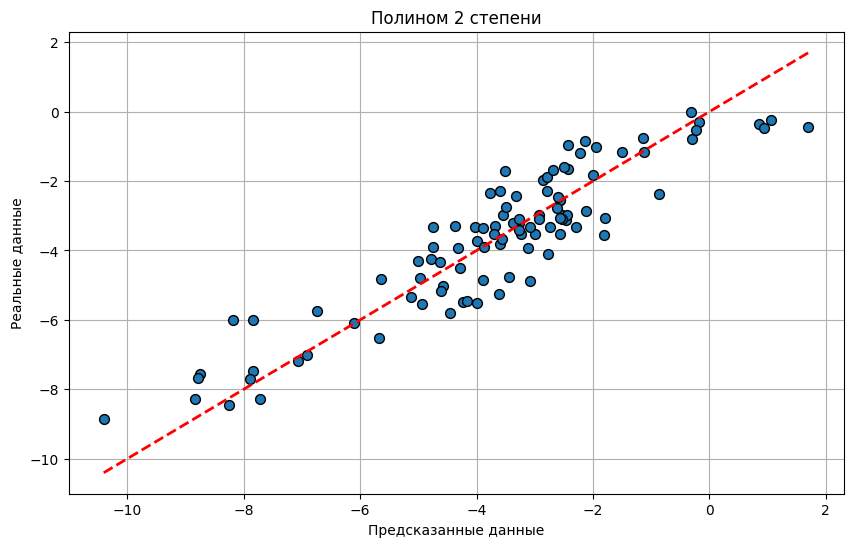

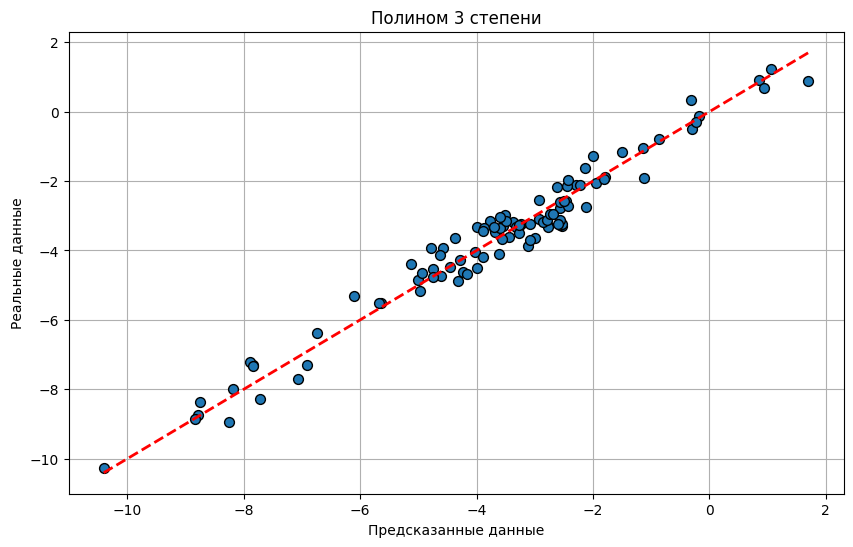

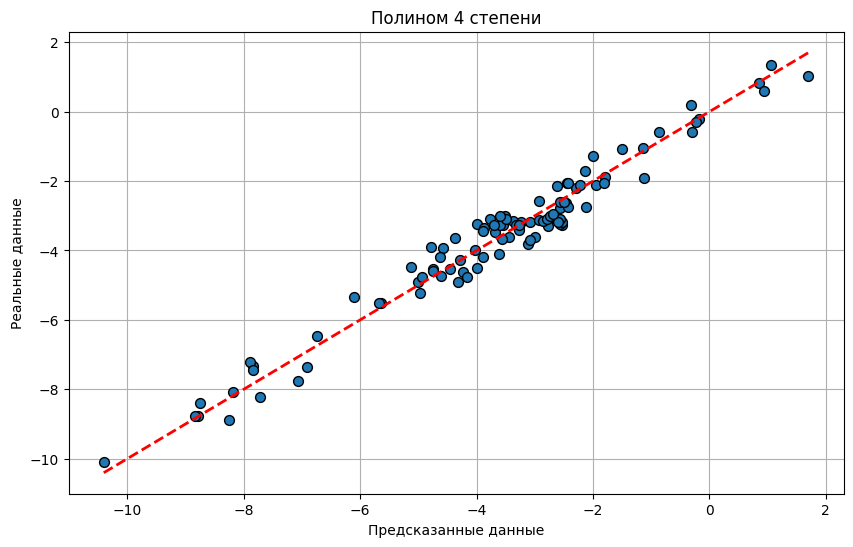

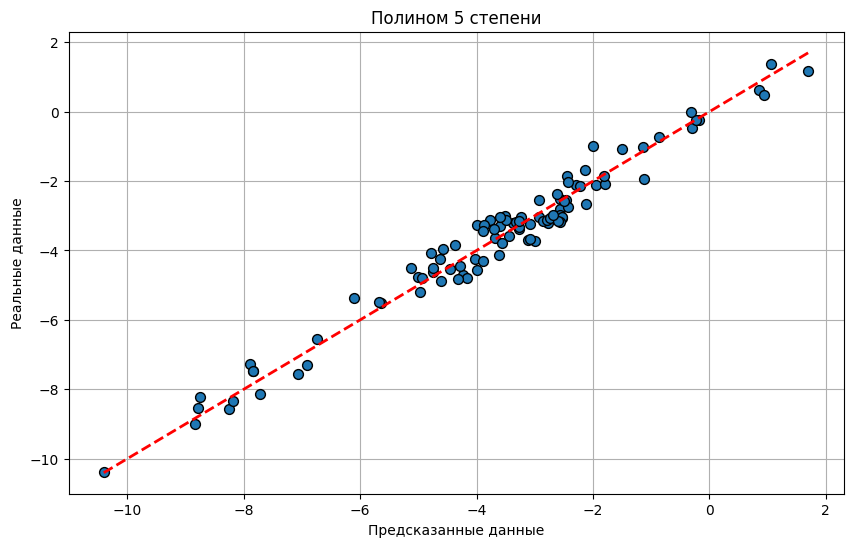

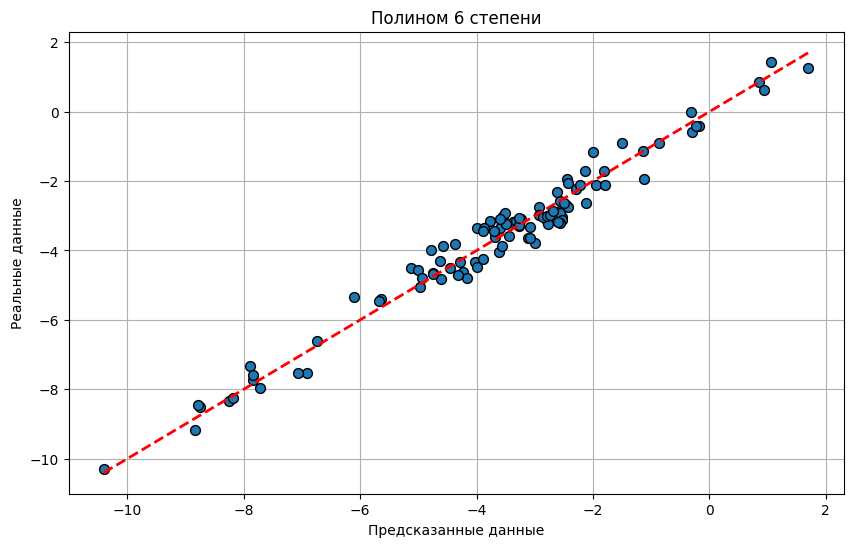

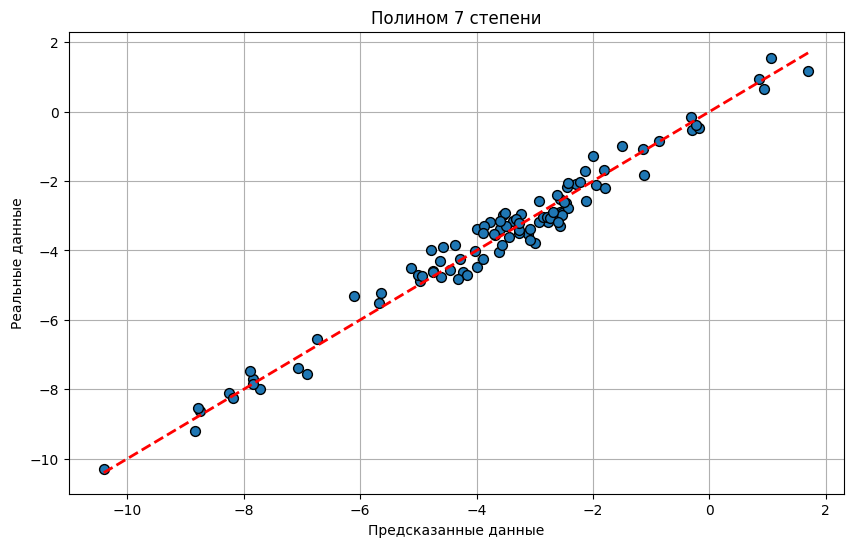

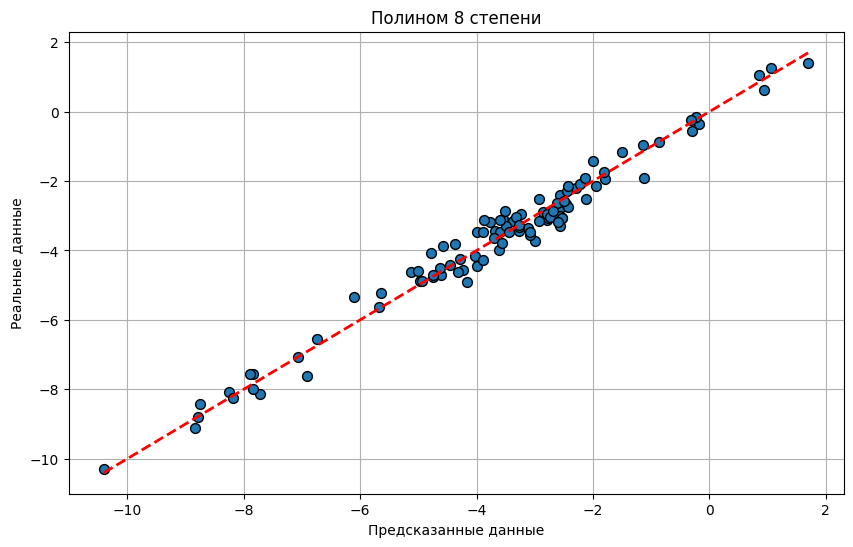

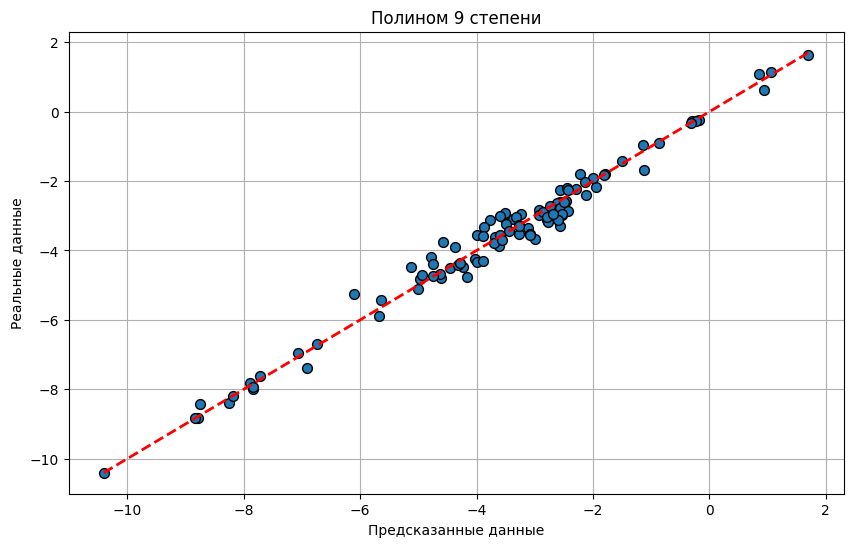

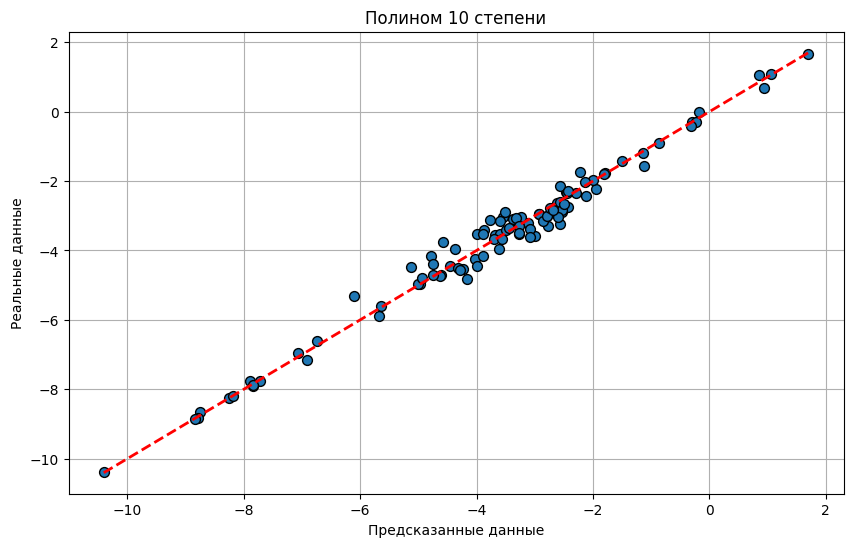

In [11]:
for degree in range(1, degrees + 1):
	col_degrees = get_col_degrees(degree)
	x, y = df[col_degrees], df["y"]
	
	model = LinearRegression().fit(x, y)
	y_pred = model.predict(x)

	plt.figure(figsize=(10, 6))
	plt.title(f"Полином {degree} степени")
	plt.scatter(y, y_pred, s=50, ec="black", zorder=3)
	plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", zorder=3, lw="2")
	
	plt.xlabel("Предсказанные данные")
	plt.ylabel("Реальные данные")
	
	plt.grid()